In [1]:
!gunzip redcard.csv.gz && rm -rf redcard.csv.gz

In [2]:
import pandas as pd
import numpy as np

#数据eda

In [3]:
data = pd.read_csv('redcard.csv')
print(data.shape)
print(data.info())
print(data.isnull().sum())
print(data.describe())

(146028, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146028 entries, 0 to 146027
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   playerShort    146028 non-null  object 
 1   player         146028 non-null  object 
 2   club           146028 non-null  object 
 3   leagueCountry  146028 non-null  object 
 4   birthday       146028 non-null  object 
 5   height         145765 non-null  float64
 6   weight         143785 non-null  float64
 7   position       128302 non-null  object 
 8   games          146028 non-null  int64  
 9   victories      146028 non-null  int64  
 10  ties           146028 non-null  int64  
 11  defeats        146028 non-null  int64  
 12  goals          146028 non-null  int64  
 13  yellowCards    146028 non-null  int64  
 14  yellowReds     146028 non-null  int64  
 15  redCards       146028 non-null  int64  
 16  photoID        124621 non-null  object 
 17  rater1         1

In [4]:
np.mean(data.groupby('playerShort').height.mean())

np.float64(181.74372848007872)

In [5]:
data.tail(10)

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
146018,slobodan-rajkovic,Slobodan Rajković,Hamburger SV,Germany,03.02.1989,191.0,88.0,Center Back,1,1,...,0.00,3147,21,HUN,0.376127,574.0,0.000714,0.49835,606.0,0.002968
146019,steven-taylor,Steven Taylor,Newcastle United,England,23.01.1986,188.0,81.0,NaN,1,1,...,0.25,3147,21,HUN,0.376127,574.0,0.000714,0.49835,606.0,0.002968
146020,timmy-simons,Timmy Simons,1. FC Nürnberg,Germany,11.12.1976,186.0,79.0,Defensive Midfielder,1,1,...,0.00,3147,21,HUN,0.376127,574.0,0.000714,0.49835,606.0,0.002968
146021,titus-bramble,Titus Bramble,Sunderland AFC,England,21.07.1981,187.0,87.0,Center Back,1,1,...,1.00,3147,21,HUN,0.376127,574.0,0.000714,0.49835,606.0,0.002968
146022,tom-huddlestone,Tom Huddlestone,Tottenham Hotspur,England,28.12.1986,188.0,80.0,Defensive Midfielder,1,0,...,0.50,3147,21,HUN,0.376127,574.0,0.000714,0.49835,606.0,0.002968
146023,tomas-rosicky,Tomáš Rosický,Arsenal FC,England,04.10.1980,178.0,67.0,Attacking Midfielder,1,1,...,0.00,3147,21,HUN,0.376127,574.0,0.000714,0.49835,606.0,0.002968
146024,winston-reid,Winston Reid,West Ham United,England,03.07.1988,190.0,87.0,Center Back,1,0,...,0.50,3147,21,HUN,0.376127,574.0,0.000714,0.49835,606.0,0.002968
146025,xherdan-shaqiri,Xherdan Shaqiri,Bayern München,Germany,10.10.1991,169.0,72.0,Left Midfielder,1,1,...,0.25,3147,21,HUN,0.376127,574.0,0.000714,0.49835,606.0,0.002968
146026,yassine-el-ghanassi,Yassine El Ghanassi,West Bromwich Albion,England,12.07.1990,173.0,NaN,Left Winger,1,0,...,0.50,3147,21,HUN,0.376127,574.0,0.000714,0.49835,606.0,0.002968
146027,zdenk-pospch,Zdeněk Pospěch,1. FSV Mainz 05,Germany,14.12.1978,174.0,72.0,Right Fullback,1,0,...,0.25,3147,21,HUN,0.376127,574.0,0.000714,0.49835,606.0,0.002968


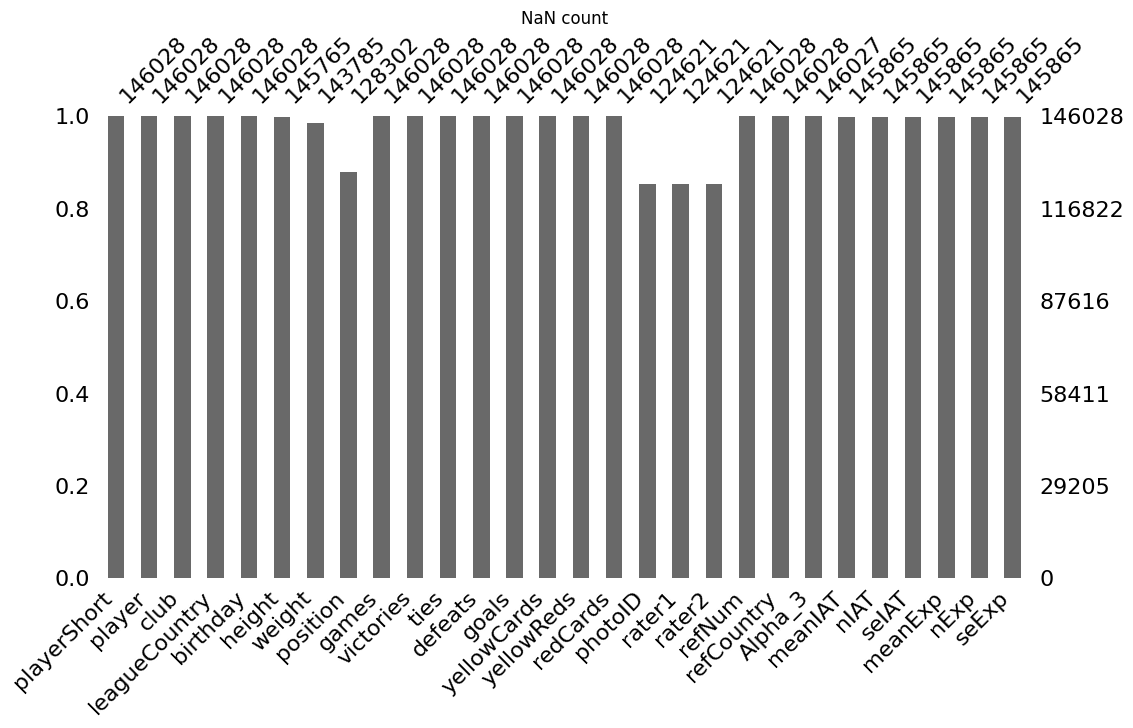

In [6]:
#可视化缺失值
import missingno as msno
import matplotlib.pyplot as plt

msno.bar(data, figsize=(12, 6))
plt.title('NaN count')
plt.show()


In [7]:
#整体eda报告
#28个特征，50个mb中等数据量可以特征工程
#数据类型无明显错误，编码不一致训练前需要对应编码
#缺失值position，photoID，rater1，rater2占比10-15%之间需要仔细斟酌，其他异常值占比小可以直接中位或者均值填充
#refNum,nExp标准差偏大需要检查是否存在异常

#整体eda后进入分组eda(tidy data)
#从不同维度分析，比如：球员，俱乐部，裁判，联赛等

In [24]:
# 球员数据tidy（是否有多余的重复行检查）
def check_player_consistency(df):
   player_cols = ['playerShort', 'birthday', 'height', 'weight', 'position', 'photoID', 'rater1', 'rater2']

   df_clean = df[player_cols].drop_duplicates().copy()
   df_clean['skinton'] = df_clean[['rater1','rater2']].mean(axis=1, skipna=True)

   df_clean.to_csv('clean_player_data.csv', index=False)
   print(f"已保存 {len(df_clean)} 条记录")
   return df_clean

if __name__ == "__main__":
   df = pd.read_csv('redcard.csv')
   df_clean = check_player_consistency(df)

已保存 2053 条记录


In [9]:
# 比赛，统计信息，球员裁判等tidy
import pandas as pd

def tidy_by_dimensions(df):
    # 1. Players - 比赛表现
    player_performance = pd.melt(df, id_vars=['playerShort', 'position'],
                                value_vars=['victories', 'ties', 'defeats'],
                                var_name='result', value_name='count')

    # 2. Referees - 统计数据
    referee_stats = pd.melt(df, id_vars=['refNum', 'refCountry'],
                           value_vars=['meanIAT', 'meanExp'],
                           var_name='stat', value_name='value').dropna()

    # 3. Dyads - 球员裁判配对
    dyads = df[['playerShort', 'refNum', 'meanIAT', 'rater1', 'yellowCards']].copy()
    dyads['pair_id'] = dyads['playerShort'] + '_' + dyads['refNum'].astype(str)

    # 4. 评分比较
    ratings = pd.melt(df, id_vars=['playerShort'],
                     value_vars=['rater1', 'rater2'],
                     var_name='rater', value_name='score').dropna()

    # 5. 卡牌数据
    cards = pd.melt(df, id_vars=['playerShort'],
                   value_vars=['yellowCards', 'redCards'],
                   var_name='card_type', value_name='count')

    return player_performance, referee_stats, dyads, ratings, cards


perf, refs, pairs, rates, cards = tidy_by_dimensions(df)

In [23]:
#完成不同维度tidy，准备分组eda
player = pd.read_csv('clean_player_data.csv')
print(perf.shape,refs.shape,pairs.shape,rates.shape,cards.shape)
print(player.shape)

(438084, 4) (291730, 4) (146028, 6) (249242, 3) (292056, 3)
(2053, 9)


In [25]:
player.head()

,playerShort,birthday,height,weight,position,photoID,rater1,rater2,skinton
0,lucas-wilchez,31.08.1983,177.0,72.0,Attacking Midfielder,95212.jpg,0.25,0.50,0.375
1,john-utaka,08.01.1982,179.0,82.0,Right Winger,1663.jpg,0.75,0.75,0.750
2,abdon-prats,17.12.1992,181.0,79.0,NaN,NaN,NaN,NaN,NaN
3,pablo-mari,31.08.1993,191.0,87.0,Center Back,NaN,NaN,NaN,NaN
4,ruben-pena,18.07.1991,172.0,70.0,Right Midfielder,NaN,NaN,NaN,NaN


/tmp/ipython-input-32-209939510.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(player[['height', 'weight', 'skinton']], alpha=0.5, diagonal='hist', ax=ax);


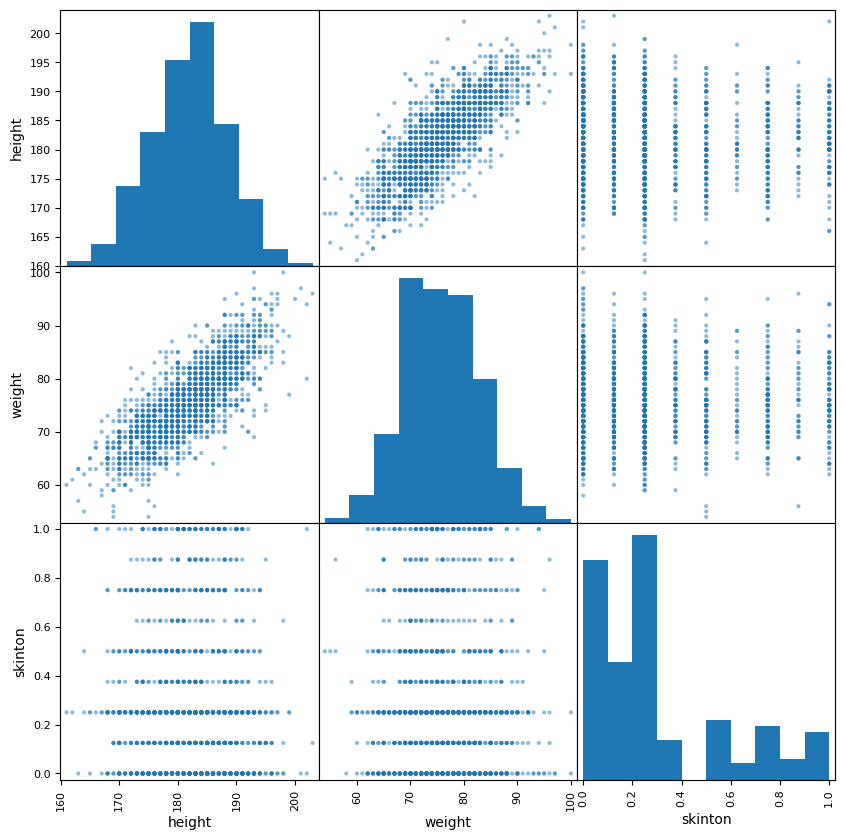

In [32]:
#用scatter_matrix手动查看参数之间的关系
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(player[['height', 'weight', 'skinton']], alpha=0.5, diagonal='hist', ax=ax);

#ydata-profiling库自动生成eda报告
#tidy分组后对不同参数生成报告检查是否存在相关信息

In [40]:
!pip install ydata-profiling

import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('clean_player_data.csv')
profile = ProfileReport(df, title="数据分析报告")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 40.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]